In [3]:
# matplotlib 패키지 등록
import matplotlib.pyplot as plt
%matplotlib inline

#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작동되록 하는 설정


import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [5]:
df_age_2017 = pd.read_csv("./data/2017년_연령별_인구현황.csv")
df_age_2020 = pd.read_csv("./data/2020년_연령별_인구현황.csv")


df_apt_price_2017 = pd.read_csv("./data/2017년도_서울시_아파트_평균금액.csv")
df_apt_price_2020 = pd.read_csv("./data/2020년도_서울시_아파트_평균금액.csv")


In [6]:
df_age_2017.head(1)

,기간,행정구역,미성년자,청년,성인,노인,남성_인구,여성_인구,총인구수,미성년자_비율,청년_비율,성인_비율,노인_비율,남녀_성비
0,2017,강남구,104370,171037,354113,97681,266442,289722,556164,18.77,30.75,63.67,17.56,91.96


In [7]:
df_apt_price_2017.head(1)

,구,년도,거래금액(만원)/전용면적(㎡),거래금액(만원)/1평,거래금액(만원)/국민평수(32평)
0,강남구,2017,1466.082319,4846.55294,155089.694095


In [9]:
df_age_2017 = df_age_2017.sort_values(by=['미성년자_비율'], ascending=False)
df_age_2017.head()

,기간,행정구역,미성년자,청년,성인,노인,남성_인구,여성_인구,총인구수,미성년자_비율,청년_비율,성인_비율,노인_비율,남녀_성비
18,2017,양천구,94124,128108,292331,84699,232518,238636,471154,19.98,27.19,62.05,17.98,97.44
14,2017,서초구,87400,129997,274437,79265,211236,229866,441102,19.81,29.47,62.22,17.97,91.90
8,2017,노원구,105227,151416,339564,109612,269508,284895,554403,18.98,27.31,61.25,19.77,94.60
0,2017,강남구,104370,171037,354113,97681,266442,289722,556164,18.77,30.75,63.67,17.56,91.96
17,2017,송파구,120844,208350,423798,119854,323147,341349,664496,18.19,31.35,63.78,18.04,94.67


In [10]:
# df_age_bar_2017 = df_age_2017.pivot_table(index="행정구역", values="미성년자_비율").sort_values(by="미성년자_비율", ascending=False)
df_age_bar_2017 = df_age_2017.pivot_table(index="행정구역", values="미성년자_비율").sort_values(by="미성년자_비율", ascending=False)

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='미성년자_비율', ylabel='행정구역'>

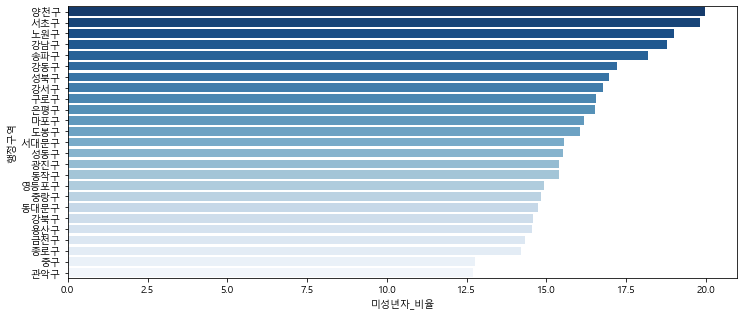

In [11]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_age_bar_2017, y=df_age_bar_2017.index, x="미성년자_비율", palette="Blues_r")

In [12]:
df_apt_price_2017 = df_apt_price_2017.sort_values(by=['거래금액(만원)/전용면적(㎡)'], ascending=False)
df_apt_price_2017.head()

,구,년도,거래금액(만원)/전용면적(㎡),거래금액(만원)/1평,거래금액(만원)/국민평수(32평)
0,강남구,2017,1466.082319,4846.552940,155089.694095
14,서초구,2017,1238.216487,4093.277490,130984.879668
17,송파구,2017,1029.914524,3404.675984,108949.631484
20,용산구,2017,1012.640605,3347.572122,107122.307909
12,마포구,2017,835.282045,2761.262855,88360.411357


In [13]:
df_apt_price_bar_2017 = df_apt_price_2017.pivot_table(index="구", values="거래금액(만원)/전용면적(㎡)").sort_values(by="거래금액(만원)/전용면적(㎡)", ascending=False)

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='거래금액(만원)/전용면적(㎡)', ylabel='구'>

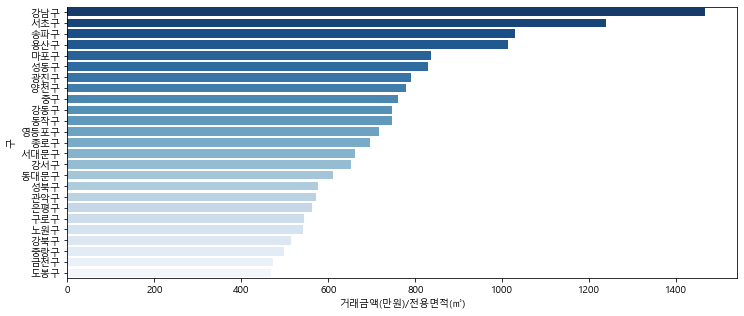

In [14]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_apt_price_bar_2017, y=df_apt_price_bar_2017.index, x="거래금액(만원)/전용면적(㎡)", palette="Blues_r")

## 남녀 성비 그래프

In [15]:
# 남녀 성비가 높은 순으로 정렬
df_age_2017 = df_age_2017.sort_values(by=['남녀_성비'], ascending=False)
df_age_2017.head()

,기간,행정구역,미성년자,청년,성인,노인,남성_인구,여성_인구,총인구수,미성년자_비율,청년_비율,성인_비율,노인_비율,남녀_성비
7,2017,금천구,33715,71375,150839,50600,119497,115657,235154,14.34,30.35,64.14,21.52,103.32
4,2017,관악구,63898,192344,338623,100776,253661,249636,503297,12.70,38.22,67.28,20.02,101.61
10,2017,동대문구,51608,107293,219036,80003,175324,175323,350647,14.72,30.60,62.47,22.82,100.00
19,2017,영등포구,55009,119858,236022,77519,183975,184575,368550,14.93,32.52,64.04,21.03,99.67
24,2017,중랑구,60572,121767,258733,88921,203325,204901,408226,14.84,29.83,63.38,21.78,99.23


<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='남녀_성비', ylabel='행정구역'>

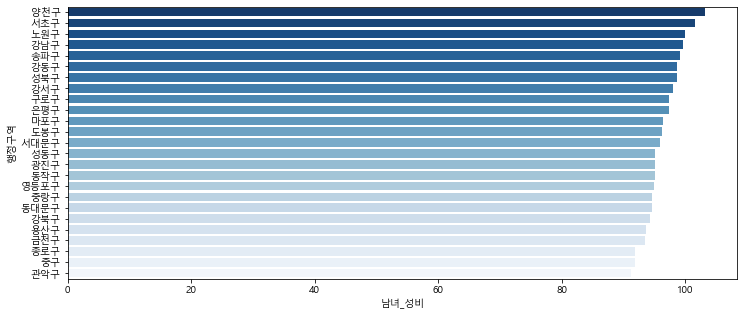

In [16]:
df_sex_bar_2017 = df_age_2017.pivot_table(index="행정구역", values="남녀_성비").sort_values(by="남녀_성비", ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(data=df_sex_bar_2017, y=df_age_bar_2017.index, x="남녀_성비", palette="Blues_r")

# 2020년 노인인구비율

In [17]:
# 노인 비율이 높은 순으로 정렬
df_age_2020 = df_age_2020.sort_values(by=['노인_비율'], ascending=False)
df_age_2020.head()

,기간,행정구역,미성년자,청년,성인,노인,남성_인구,여성_인구,총인구수,미성년자_비율,청년_비율,성인_비율,노인_비율,남녀_성비
2,2020,강북구,37741,81701,181061,89253,150143,157912,308055,12.25,26.52,58.78,28.97,95.08
9,2020,도봉구,44402,84405,189960,90895,158620,166637,325257,13.65,25.95,58.40,27.95,95.19
23,2020,중구,13609,38693,77406,34225,61222,64018,125240,10.87,30.90,61.81,27.33,95.63
22,2020,종로구,18540,43359,91049,39795,72635,76749,149384,12.41,29.03,60.95,26.64,94.64
24,2020,중랑구,49823,114236,241647,103232,195165,199537,394702,12.62,28.94,61.22,26.15,97.81


<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='노인_비율', ylabel='행정구역'>

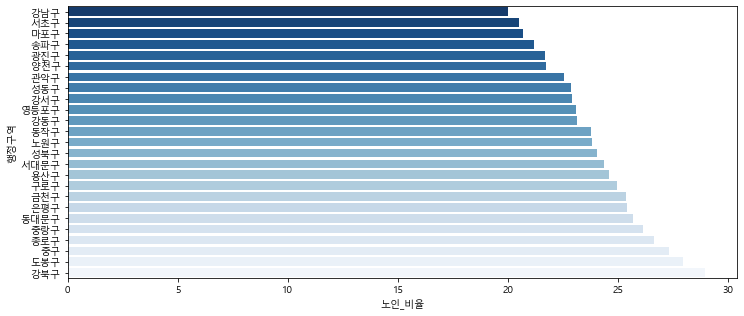

In [18]:
df_age_elders_bar_2020 = df_age_2020.pivot_table(index="행정구역", values="노인_비율").sort_values(by="노인_비율", ascending=True)
plt.figure(figsize=(12,5))
sns.barplot(data=df_age_elders_bar_2020, y=df_age_elders_bar_2020.index, x="노인_비율", palette="Blues_r")

<Figure size 1440x360 with 0 Axes>

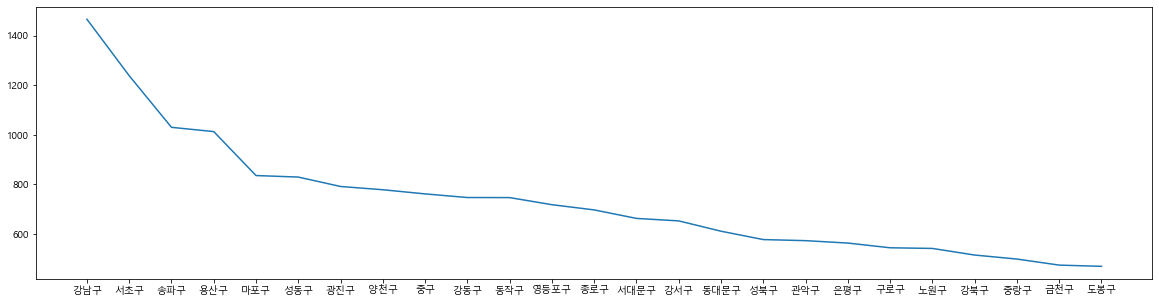

In [26]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 5))
x_values = df_apt_price_2017["구"]
y_values = df_apt_price_2017['거래금액(만원)/전용면적(㎡)']

plt.plot(x_values, y_values)


plt.show()




<Figure size 1440x360 with 0 Axes>

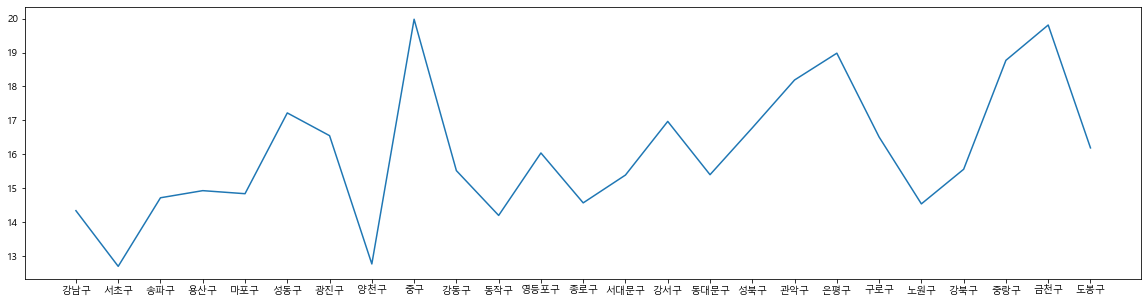

In [27]:
plt.figure(figsize=(20, 5))
x_values = df_apt_price_2017["구"]
y_values_2 = df_age_2017["미성년자_비율"]

plt.plot(x_values, y_values_2)


plt.show()



